# **Introduction**

This notebook explores various approaches to **data visualisation** using python.

Immigrants from 150+ countries between 1980 to 2013

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Let's explore some EDA in Python - **Exploratory Data Analysis**

In [2]:
#Importing Libraries 
import numpy as np  
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from wordcloud import WordCloud, STOPWORDS

# Inline backend
%matplotlib inline
mpl.style.use(['ggplot'])
import warnings
warnings.filterwarnings('ignore')

**Data Extraction**

In [3]:
! pip install kaggle #install kaggle library
! mkdir ~/.kaggle #make a directory for kaggle

In [4]:
cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
#! kaggle datasets download unitednations/refugee-data #also works
!kaggle datasets download -d ammaraahmad/immigration-to-canada

  0% 0.00/12.9k [00:00<?, ?B/s]
100% 12.9k/12.9k [00:00<00:00, 11.1MB/s]


In [6]:
! unzip immigration-to-canada.zip #to unzip the data

Archive:  immigration-to-canada.zip
  inflating: canadian_immegration_data.csv  


In [7]:
immigration_canada = pd.read_csv("canadian_immegration_data.csv") #from csv into pandas 
immigration_canada.head(20) #Test Data

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,5,11,6,8,23,26,22,8,26,38,27,58,49,70,169,168,165,268,295,184,106,76,62,61,39,70,45,2113
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,61,34,51,31,59,61,44,18,23,21,27,19,12,13,25,17,25,14,24,32,15,32,38,27,37,51,25,981
7,Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,519,374,538,678,763,1023,1022,366,380,396,391,349,318,427,635,865,1745,1591,1153,847,620,540,467,459,278,263,282,19596
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207,3310
9,Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,356,467,410,553,620,640,734,886,702,668,699,623,479,523,599,799,747,876,930,909,875,1033,1018,1018,933,851,982,1121,23829


## **Data Processing**

In [8]:
immigration_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

In [9]:
immigration_canada.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [10]:
print(f'Number of rows: {immigration_canada.shape[0]}; Number of columns: {immigration_canada.shape[1]}; Number of missing values: {sum(immigration_canada.isna().sum())}')

Number of rows: 195; Number of columns: 39; Number of missing values: 0


In [11]:
immigration_canada.Region.value_counts() #counting the number of occurence for Region column

Western Asia                 18
Eastern Africa               17
Western Africa               16
Southern Europe              14
Caribbean                    13
South America                12
Northern Europe              10
South-Eastern Asia           10
Eastern Europe               10
Western Europe                9
Southern Asia                 9
Middle Africa                 9
Central America               8
Eastern Asia                  7
Northern Africa               7
Central Asia                  5
Southern Africa               5
Melanesia                     4
Polynesia                     4
Micronesia                    4
Australia and New Zealand     2
Northern America              2
Name: Region, dtype: int64

In [12]:
immigration_canada.Continent.value_counts() #counting the number of occurence for Continent column

Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: Continent, dtype: int64

In [13]:
Continent_count = immigration_canada['Continent'].value_counts().sort_index() 
Continent_count_immigration_canada = pd.DataFrame(Continent_count)
#pd.options.display.float_format = '{:,.2f}%'.format
Continent_count_immigration_canada['Continent(%)'] = (Continent_count_immigration_canada/Continent_count.sum()*100)
Continent_count_immigration_canada.sort_values('Continent(%)', ascending=False, inplace=True)
display(Continent_count_immigration_canada)

,Continent,Continent(%)
Africa,54,27.692308
Asia,49,25.128205
Europe,43,22.051282
Latin America and the Caribbean,33,16.923077
Oceania,14,7.179487
Northern America,2,1.025641


In [14]:
immigration_canada.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

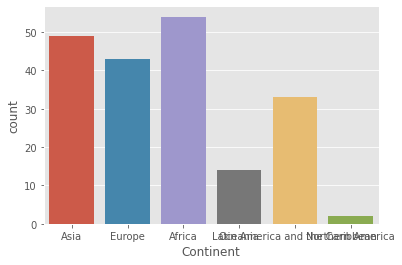

In [15]:
sns.countplot(immigration_canada['Continent'])
# just a simple plot, we'll plot more as we go further

## Data Transformation

In [16]:
# For consistency, we need to ensure that all column (labels) are of type string 
# by checking the types of the column labels
all(isinstance(column, str) for column in immigration_canada.columns)

True

**Change first reference column**

In [17]:
# We set the country name as index (first reference column)
immigration_canada.set_index('Country', inplace=True)
immigration_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [18]:
print('Data dimensions:', immigration_canada.shape)

Data dimensions: (195, 38)


In [19]:
# Short summary 
immigration_canada.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Columns: 38 entries, Continent to Total
dtypes: int64(35), object(3)
memory usage: 59.4+ KB


In [20]:
# Column names
# it wont count country column because it's the index
immigration_canada.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [21]:
# we'll be using this later on to plot
years = list(map(str, range(1980, 2014)))

# EDA 1 

## with Matplotlib

In [22]:
# Top 10 countries that contributed the most to immigration to Canada.
immigration_canada10 = immigration_canada.copy(deep=True)

immigration_canada10.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 10 entries
immigration_canadaten = immigration_canada10.head(10)

# transpose the dataframe
immigration_canadaten = immigration_canadaten[years].transpose()

immigration_canadaten.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland
1980,8880,5123,22045,6051,978,9378,1172,185,1011,863
1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930
1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881
1983,7338,1863,10015,4562,900,7100,1592,197,1081,4546
1984,5704,1527,10170,3801,668,6661,1977,1086,847,3588


## Multiple Line Plot

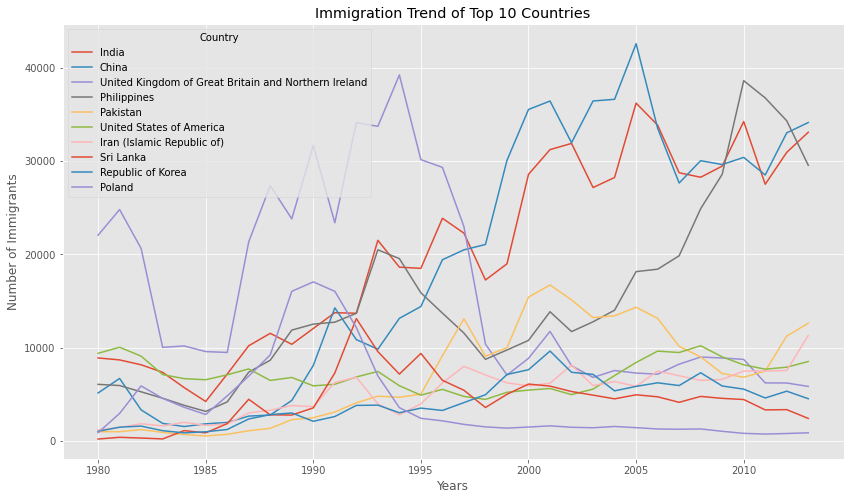

In [23]:
# Compare the trends of top 5 countries that contributed the most to immigration to Canada.
immigration_canadaten.plot(kind='line', figsize=(14, 8)) 

plt.title('Immigration Trend of Top 10 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Area Graph

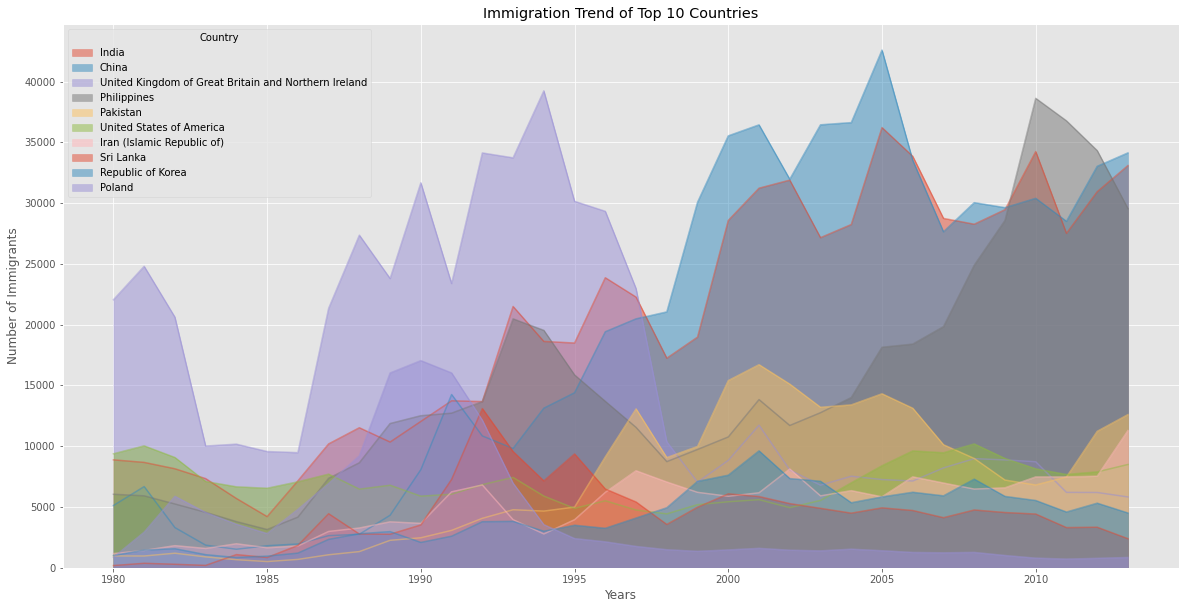

In [24]:
# let's change the index values of df_topfiv to type integer for plotting
immigration_canadaten.index = immigration_canadaten.index.map(int)
immigration_canadaten.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 10 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

**Transposed dataframe** - we have **countries** (former index at the columns) while **year** as the rows

In [25]:
# transposed dataframe
immigration_canada_t = immigration_canada[years].transpose()

# cast the Years (the index) to type int
immigration_canada_t.index = map(int, immigration_canada_t.index)

# let's label the index. This will automatically be the column name when we reset the index
immigration_canada_t.index.name = 'Year'

# reset index to bring the Year in as a column
immigration_canada_t.reset_index(inplace=True)

# view the changes
immigration_canada_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,"China, Hong Kong Special Administrative Region","China, Macao Special Administrative Region",...,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,702,234,0,26,0,83,372,0,511,16,2,0,44,0,10,211,79,24,2,0,1,12,9,0,4,0,1233,5123,0,0,...,6,241,0,0,7,1026,211,185,0,20,15,4,281,806,315,0,56,0,5,2,958,58,481,0,0,13,0,0,22045,635,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,639,238,0,23,2,84,376,0,540,27,5,0,52,0,1,220,6,20,1,0,1,19,2,0,3,0,1069,6682,0,0,...,6,301,0,0,10,1118,299,371,0,12,10,1,308,811,419,0,53,0,5,4,947,51,874,0,1,16,0,2,24796,832,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,484,201,0,38,1,86,299,0,519,13,4,0,42,0,3,192,8,12,3,0,2,26,16,0,1,1,1078,3308,0,0,...,7,337,0,0,7,781,260,290,0,11,21,1,222,634,409,0,113,0,2,7,972,55,706,0,0,17,0,2,20620,621,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,317,117,0,12,1,81,244,0,297,21,3,0,49,0,3,139,2,33,2,0,0,33,7,0,0,0,781,1863,0,0,...,3,169,0,0,12,379,133,197,0,7,12,0,176,370,269,0,65,0,3,1,766,46,280,0,0,38,0,1,10015,474,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,317,127,0,21,1,98,265,0,183,37,4,1,38,0,7,145,2,11,3,1,11,10,8,0,0,0,681,1527,0,0,...,12,128,0,0,14,271,137,1086,0,23,5,10,128,326,264,0,82,0,6,2,606,51,338,0,1,32,0,2,10170,473,6661,90,0,0,142,7583,0,0,16,32


## Bubble Plot

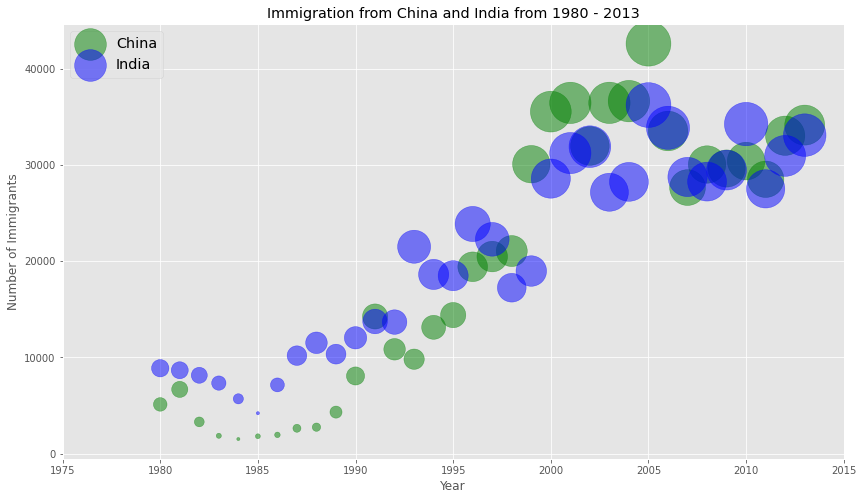

In [26]:
#Comparing India and China

# normalized Chinese data
norm_china = (immigration_canada_t['China'] - immigration_canada_t['China'].min()) / (immigration_canada_t['China'].max() - immigration_canada_t['China'].min())

# normalized Indian data
norm_india = (immigration_canada_t['India'] - immigration_canada_t['India'].min()) / (immigration_canada_t['India'].max() - immigration_canada_t['India'].min())

# China
ax0 = immigration_canada_t.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=norm_china * 2000 + 10,  # pass in weights 
                        xlim=(1975, 2015)
                       )

# India
ax1 = immigration_canada_t.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

**Comparing Nigeria with India**

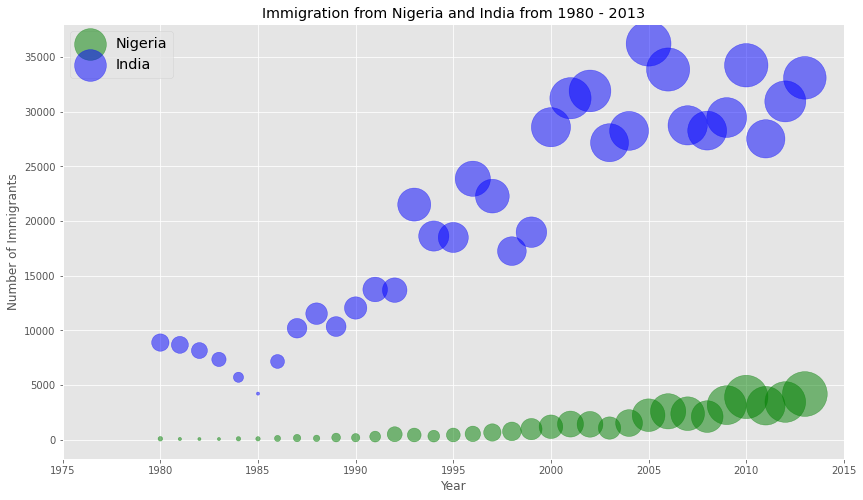

In [27]:
#Comparing Nigeria and India

# normalized Nigeria data
norm_nigeria = (immigration_canada_t['Nigeria'] - immigration_canada_t['Nigeria'].min()) / (immigration_canada_t['Nigeria'].max() - immigration_canada_t['Nigeria'].min())

# normalized Indian data
norm_india2 = (immigration_canada_t['India'] - immigration_canada_t['India'].min()) / (immigration_canada_t['India'].max() - immigration_canada_t['India'].min())

# Nigeria
ax0b = immigration_canada_t.plot(kind='scatter',
                        x='Year',
                        y='Nigeria',
                        figsize=(14, 8),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=norm_nigeria * 2000 + 10,  # pass in weights 
                        xlim=(1975, 2015)
                       )

# India
ax1b = immigration_canada_t.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india2 * 2000 + 10,
                        ax = ax0b
                       )

ax0b.set_ylabel('Number of Immigrants')
ax0b.set_title('Immigration from Nigeria and India from 1980 - 2013')
ax0b.legend(['Nigeria', 'India'], loc='upper left', fontsize='x-large')

## Word Cloud

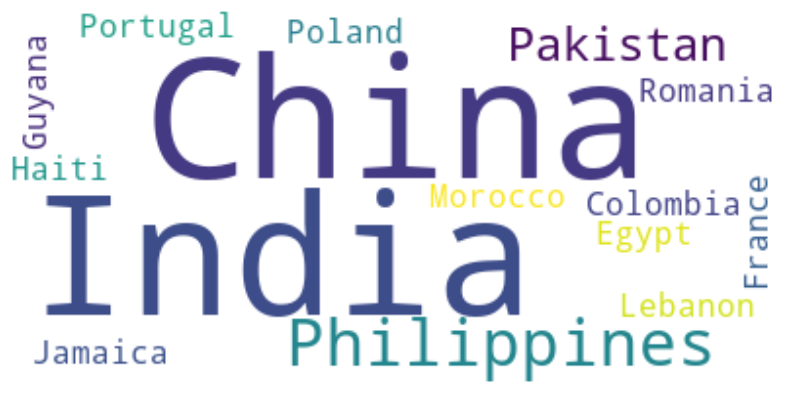

In [28]:
stopwords = set(STOPWORDS)

total_immigration = immigration_canada['Total'].sum()
total_immigration

max_words = 90
word_string = ''
for country in immigration_canada.index.values:
    # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(immigration_canada.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Histogram

In [29]:
# What is the immigration distribution for China,Philippines, India for years 1980 - 2013?

# let's quickly view the dataset 
immigration_canada.loc[['China','Philippines', 'India'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [30]:
# transpose dataframe
immigration_t = immigration_canada.loc[['China','Philippines', 'India'], years].transpose()
immigration_t.head()

Country,China,Philippines,India
1980,5123,6051,8880
1981,6682,5921,8670
1982,3308,5249,8147
1983,1863,4562,7338
1984,1527,3801,5704


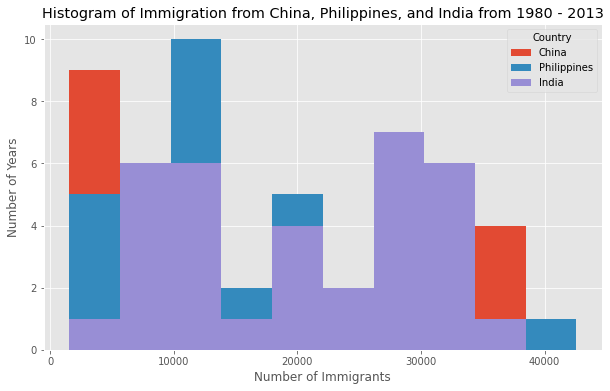

In [31]:
# generate histogram df_t
immigration_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from China, Philippines, and India from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

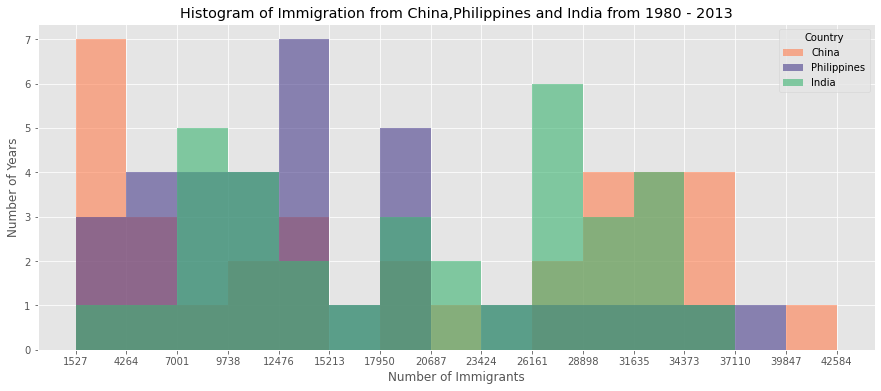

In [32]:
# let's get the x-tick values
count, bin_edges = np.histogram(immigration_t, 15)

# un-stacked histogram
immigration_t.plot(kind ='hist', 
          figsize=(15, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from China,Philippines and India from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

## Bar Plot

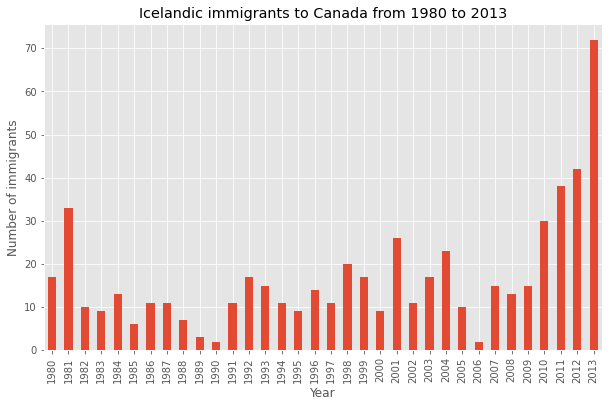

In [33]:
#Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013

# step 1: get the data
immigration_iceland = immigration_canada.loc['Iceland', years]

# step 2: plot data
immigration_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()


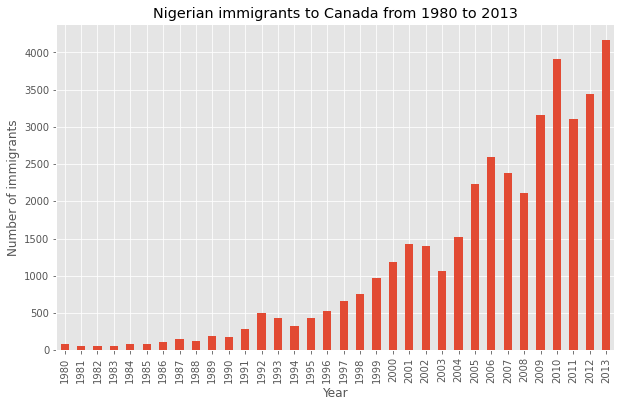

In [34]:
#Let's compare the number of Nigerian immigrants (country = 'Nigeria') to Canada from year 1980 to 2013

# step 1: get the data
immigration_nigeria = immigration_canada.loc['Nigeria', years]

# step 2: plot data
immigration_nigeria.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Nigerian immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

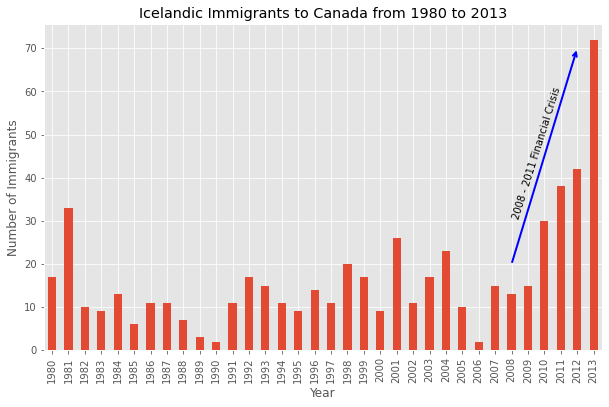

In [35]:
immigration_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

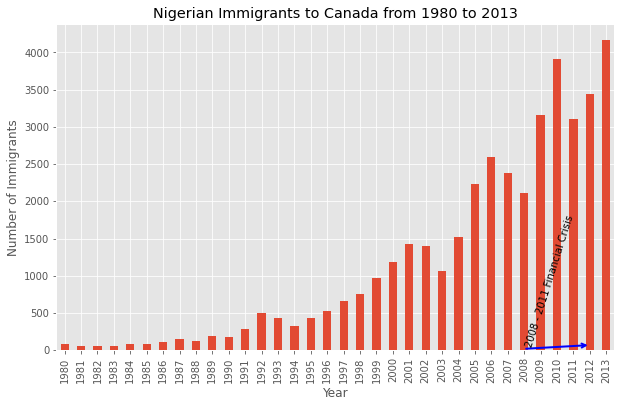

In [36]:
immigration_nigeria.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Nigerian Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

## Pie Chart

In [37]:
# group countries by continents and apply sum() function 
immigration_canada_continents = immigration_canada.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(immigration_canada.groupby('Continent', axis=0)))

immigration_canada_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


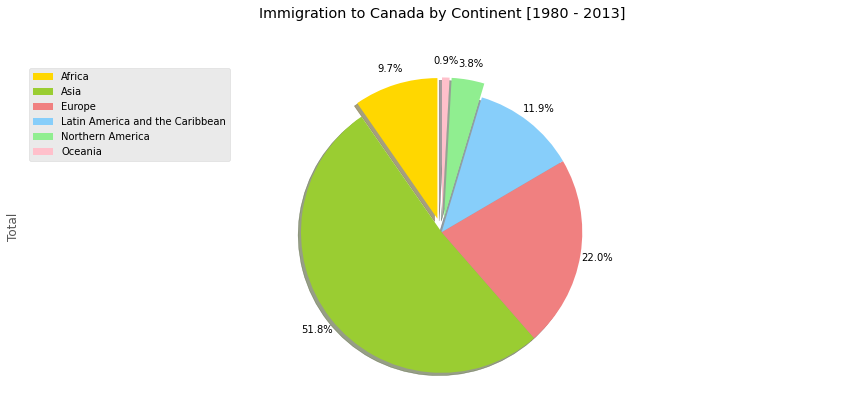

In [38]:
# Modified Pie chart
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

immigration_canada_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=immigration_canada_continents.index, loc='upper left') 

plt.show()


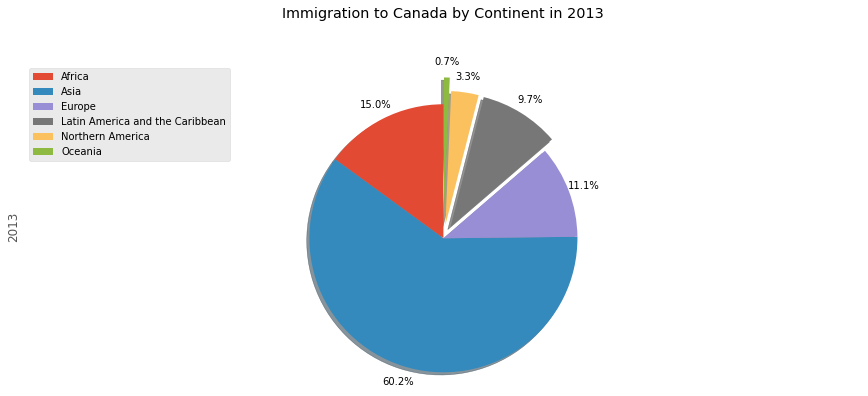

In [39]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

immigration_canada_continents['2013'].plot(kind='pie',
                                            figsize=(15, 6),
                                            autopct='%1.1f%%',
                                            startangle=90,
                                            shadow=True,  
                                            labels=None,                 # turn off labels on pie chart
                                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                                            explode=explode_list         # 'explode' lowest 3 continents
    )
                             
                                              
# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=immigration_canada_continents.index, loc='upper left') 

# show plot
plt.show()

## Box Plot

In [40]:
# Comparing immegrants from China,India and Philippines using Box plot
immigration_canada_CIP= immigration_canada.loc[['China', 'India','Philippines'], years].transpose()
immigration_canada_CIP.head()

Country,China,India,Philippines
1980,5123,8880,6051
1981,6682,8670,5921
1982,3308,8147,5249
1983,1863,7338,4562
1984,1527,5704,3801


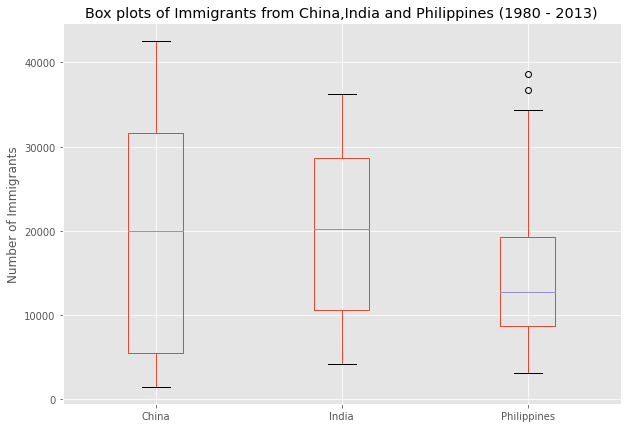

In [41]:
immigration_canada_CIP.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China,India and Philippines (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

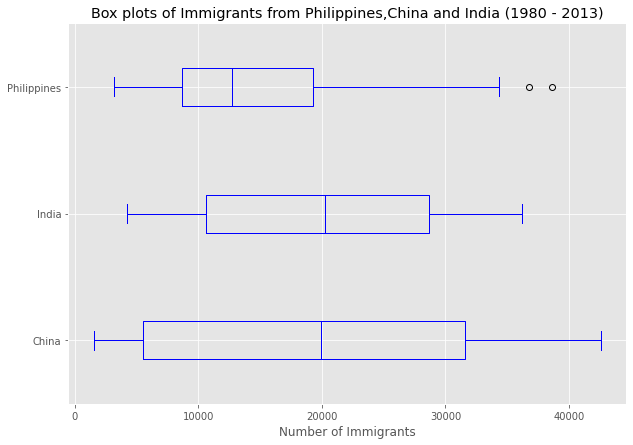

In [42]:
# horizontal box plots
immigration_canada_CIP.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from Philippines,China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

## Sub Plots

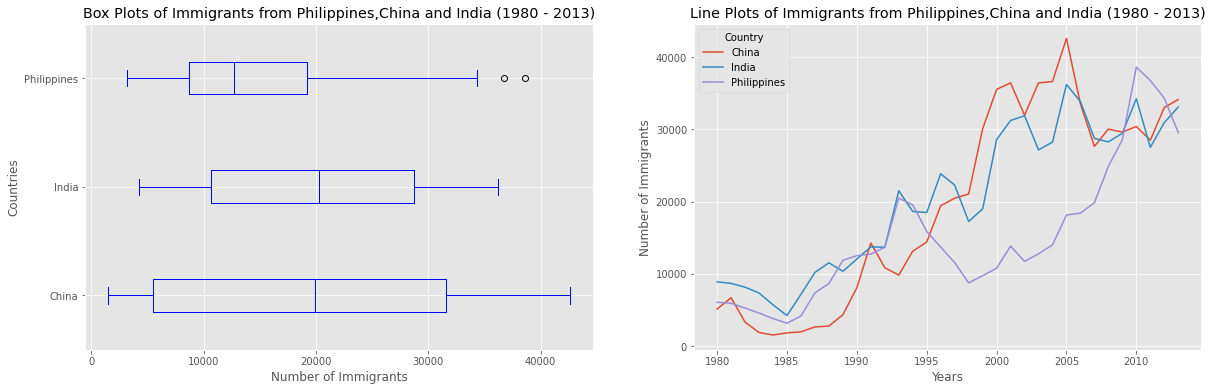

In [43]:
fig = plt.figure() # create figure

ax0c = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1c = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
immigration_canada_CIP.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0c) # add to subplot 1
ax0c.set_title('Box Plots of Immigrants from Philippines,China and India (1980 - 2013)')
ax0c.set_xlabel('Number of Immigrants')
ax0c.set_ylabel('Countries')

# Subplot 2: Line plot
immigration_canada_CIP.plot(kind='line', figsize=(20, 6), ax=ax1c) # add to subplot 2
ax1c.set_title ('Line Plots of Immigrants from Philippines,China and India (1980 - 2013)')
ax1c.set_ylabel('Number of Immigrants')
ax1c.set_xlabel('Years')

plt.show()

In [44]:
# Immigration from top 15 countries for decades 80s, 90s and 2000s
#new_df = new_immigration_canada

immigration_canada_top15 = immigration_canada.sort_values(['Total'], ascending=False, axis=0).head(15)
immigration_canada_top15
#The correct answer is:

# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
immigration_canada_80s = immigration_canada_top15.loc[:, years_80s].sum(axis=1) 
immigration_canada_90s = immigration_canada_top15.loc[:, years_90s].sum(axis=1) 
immigration_canada_00s = immigration_canada_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_immigration_canada = pd.DataFrame({'1980s': immigration_canada_80s, '1990s': immigration_canada_90s, '2000s':immigration_canada_00s}) 

# display dataframe
new_immigration_canada.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


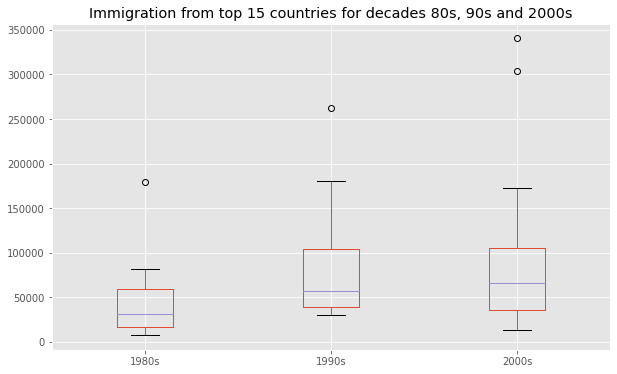

In [45]:
new_immigration_canada.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

In [46]:
new_immigration_canada=new_immigration_canada.reset_index()
new_immigration_canada[new_immigration_canada['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


"China and India are both considered as outliers since their population for the decade exceeds 209,611.5."

## Scatter Plot

In [47]:
# Step 1: Get the dataset.

# we can use the sum() method to get the total population per year
immigration_canada_tot = pd.DataFrame(immigration_canada[years].sum(axis=0))

# change the years to type int (useful for regression later on)
immigration_canada_tot.index = map(int, immigration_canada_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
immigration_canada_tot.reset_index(inplace = True)

# rename columns
immigration_canada_tot.columns = ['year', 'total']

# view the final dataframe
immigration_canada_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


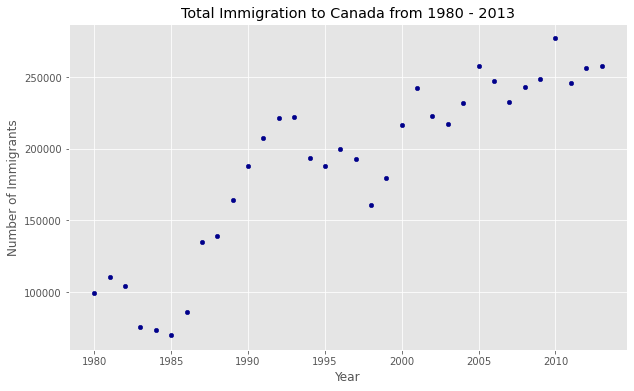

In [48]:
# Plot the data
immigration_canada_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases.

In [49]:
x = immigration_canada_tot['year']      # year on x-axis
y = immigration_canada_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

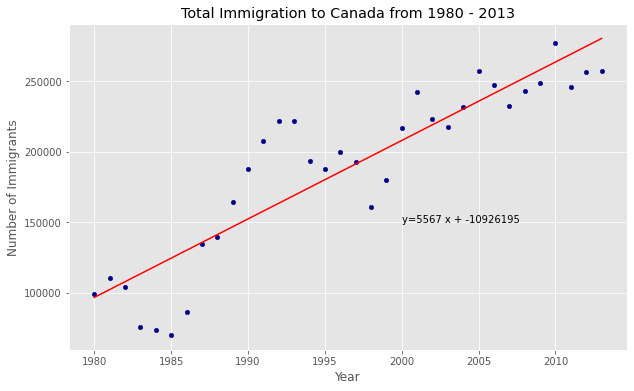

'No. Immigrants = 5567 * Year + -10926195'

In [50]:
# We can mathematically analyze this upward trend using a regression line (line of best fit) as shown in following
immigration_canada_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])


## Waffle Charts

In [51]:
# let's create a new dataframe for these three countries 
immigration_canada_dsn = immigration_canada.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
immigration_canada_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,5866


In [52]:
# Step 1. The first step into creating a waffle chart is determing the proportion of each category with respect to the total

# compute the proportion of each category with respect to the total
total_values = immigration_canada_dsn['Total'].sum()
category_proportions = immigration_canada_dsn['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [53]:
# Step 2. The second step is defining the overall size of the waffle chart
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


In [54]:
# Step 3. The third step is using the proportion of each category to determine it respective number of tiles

# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


In [55]:
# Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

<Figure size 432x288 with 0 Axes>

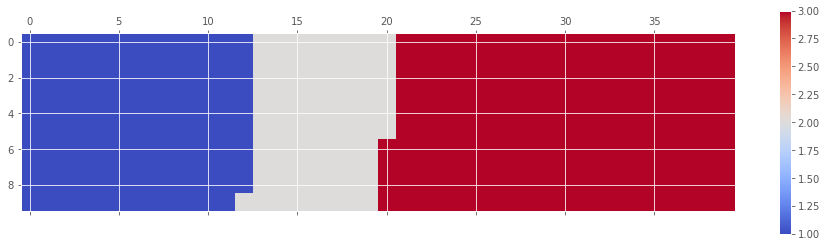

In [56]:
#Step 5. Map the waffle chart matrix into a visual.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 432x288 with 0 Axes>

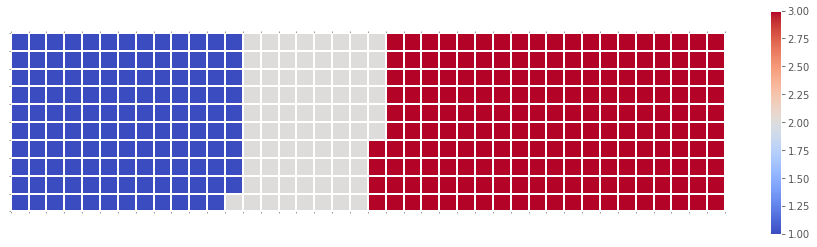

In [57]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

# EDA 2

## Data Viz with Folium

In [58]:
# define the world map
world_map = folium.Map()

# display world map
world_map

## Stamen Toner Maps

In [62]:
#define Philippines's geolocation coordinates
Philippines_latitude = 12.8797
Philippines_longitude = 121.7740

Philippines_map = folium.Map(location=[Philippines_latitude, Philippines_longitude], zoom_start=3, tiles='Stamen Toner')

# display world map
Philippines_map

In [63]:
#define Nigeria's geolocation coordinates
Nigeria_latitude = 9.0820
Nigeria_longitude = 8.6753

Nigeria_map = folium.Map(location=[Nigeria_latitude, Nigeria_longitude], zoom_start=3, tiles='Stamen Toner')

# display world map
Nigeria_map

## Stamen Terrain Maps

In [64]:
# create a Stamen Terrain map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=3, tiles='Stamen Terrain')

# display map
world_map

## Choropleth Maps

In [65]:
world_geo = '../input/world-countries/world-countries.json'
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
#df.head()

In [ ]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=immigration_canada,
    columns=['Country', 'Total', ],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

## Data Viz with Seaborn

In [78]:
# we can use the sum() method to get the total population per year
immigration_canada_tot = pd.DataFrame(immigration_canada[years].sum(axis=0))

# change the years to type float (useful for regression later on)
immigration_canada_tot.index = map(float, immigration_canada_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
immigration_canada_tot.reset_index(inplace=True)

# rename columns
immigration_canada_tot.columns = ['year', 'total']

# view the final dataframe
immigration_canada_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


## Regression Plots

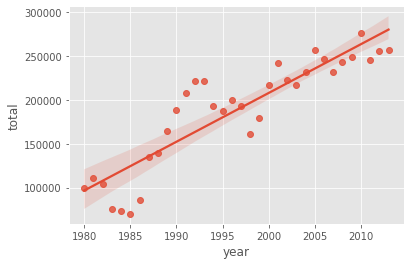

In [79]:
sns.regplot(x='year', y='total', data=immigration_canada_tot)

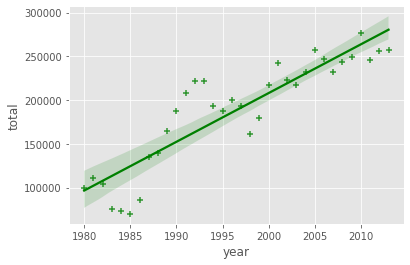

In [81]:
ax = sns.regplot(x='year', y='total', data=immigration_canada_tot, color='green', marker='+')
plt.show()

## Modified Regression Plot

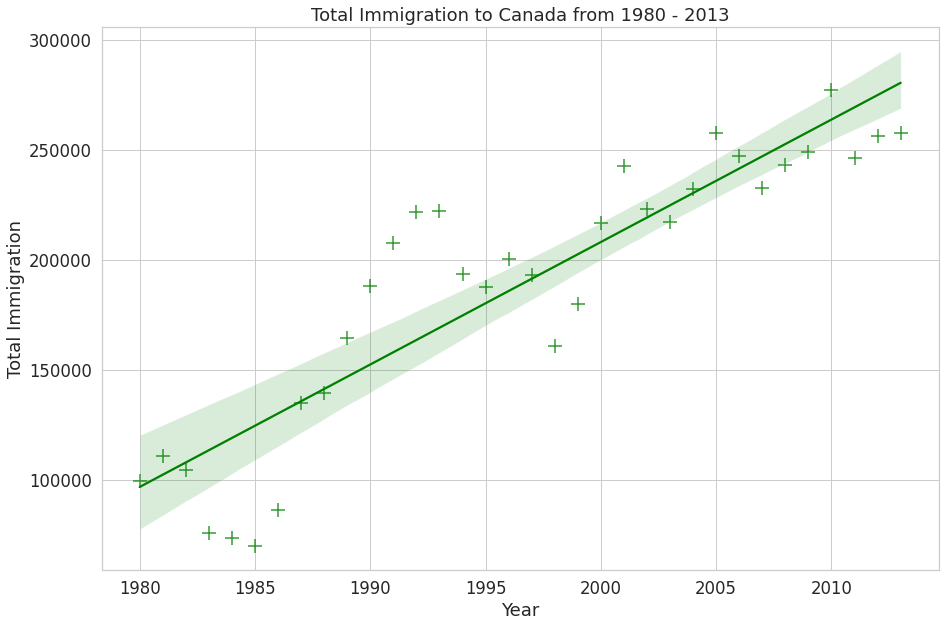

In [82]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=immigration_canada_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

# EDA 3 - Using Plotly Part 1 - next series

In [ ]:
#watch for next series on Plotly

Data Source: [link](https://www.kaggle.com/ammaraahmad/immigration-to-canada)


---

**References:**

[Source 1 - Data Visualisation Crash Course](https://www.kaggle.com/ammaraahmad/data-visualization-crash-course/notebook)

[Source 2 - Interactive Visualisation using Plotly](https://www.kaggle.com/ammaraahmad/interactive-visualizations-using-plotly/notebook)

[Source 3 - Data Visualisations using Plotly](https://www.kaggle.com/ammaraahmad/data-visualization-using-plotly)

[Source 4 - Data Visualisation using Race plot](https://www.kaggle.com/aqsasadaf/immigrants-arriving-in-canada-raceplotly)